# Introduction


The Boston Housing Dataset contains the following columns as per https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollar
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's
    
    

# Dataset Exploration

This section will explore and describe the dataset using descriptive statistics and plots. Please ensure you load the data as per the below section and progress from top to buttoom to ensure the code is going to run properly. 

## Importing packages and loading the dataset

The data will be loaded into a pandas DataFrame. A DataFrame is useful being a "Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)" (3). Being size-mutable means that the structure will allow you to append / delete elements. A DataFrame also allows for heterogeneous data, which means that it can include a variety of data types like strings, integers and floats. Additionally, the labeled axes are useful for plots and to slice and understand the dataset.

Below is a quick summary of the packages used in this notebook: 

**NumPy** – “the fundamental package for numerical computation. It defines the numerical array and matrix types and basic operations on them.” (4) http://www.numpy.org/

**Matplotlib** – “a mature and popular plotting package, that provides publication-quality 2D plotting as well as rudimentary 3D plotting” (4) https://matplotlib.org/

**Seaborn** – “a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.”(5) https://seaborn.pydata.org/

**Pandas** – “providing high-performance, easy to use data structures.” (4) http://pandas.pydata.org/

**SciPy Library** – “a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.” (4) https://www.scipy.org/scipylib/index.html


### References

(3) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

(4) https://www.scipy.org/about.html

(5) https://seaborn.pydata.org/

In [1]:
#please run this to import the necessary packages for this notebook to keep the code concise

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats

#load dataset
boston_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
print(boston_data.head()) #prints first 5 rows


print()
print("Thank you!")

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Thank you!


## Sizing the dataset up

As a first step, let us have a look at the dataset we are dealing with.

In [2]:
boston_data.shape # outputs number of rows and columns

(506, 14)

In [3]:
boston_data.dropna() #cleanup: delete rows with missing values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
boston_data.shape #shows number of rows and columns

(506, 14)

I used the .shape command to show me how many rows and columns the dataset has - 506 rows and 14 columns. .dropna allows me to delete rows with missing values and as I run the .shape command again, I can see that no rows were deleted - hence the dataset did not contain any missing values.

# Exploring the Boston Housing Dataset using descriptive Statistics

The dataset contains of exclusively numeric data, with the exception of column "chas" that is categorical and denotes location by the river with a 1 or 0. Integers and floats are spread across 14 columns and 506 rows, as shown above by the .shape command. This is a large amount of data, so at a glance it is not possible to draw any useful information from it. The Python packages include many useful commands that allow to use descriptive statistic operations on the dataset. This will allow to break down the dataset and single out attributes that stand out, for example because they seem to correlate with one another. 



In [5]:
boston_data.describe() #stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston_data.corr() # returns correlation between columns

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Descriptive statistics: Spotlight on river location

In the second part of this workbook it will be analysed whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. Therefore, let us look more closely at the column "chas" (categorical value 1/0 that denotes whether the property is by the river) and "medv" (house price).

Swarmplots are a useful tool to get a look at the data. Every dot denotes a datapoint. I have decided to include the rooms as a variable in below swarmplot as we can assume from general knowledge that houseprices tend to increase with the amount of rooms they have. The below is very interesting. Firstly, not in line with my assumption, the number of rooms does not seem to correlate strongly with the house value. By looking at the above correlation matrix, we can see that the correlation is indeed 0.695, which denotes a positive correlation, however it might be argued whether this correlation is significant. It is also worth noting that the number of rooms seems to be well distributed. In comparison to the correlation between the river location and the number of rooms is insignificant, it is 0.091 and you can tell from the plot below, that the orange dots are scattered. 

Most notacibly however, we can see very few orange dots. We can use the .value_counts() function to retrieve how many unique values we have in a column and this shows that the dataset of 506 rows only includes 35 properties by the river. This is a strong minority compared to the multitude of datapoints we have for non-river properties. I am also taking this opportunity to create two separate datasets "by_river" and "not_river" to simplify analysis.

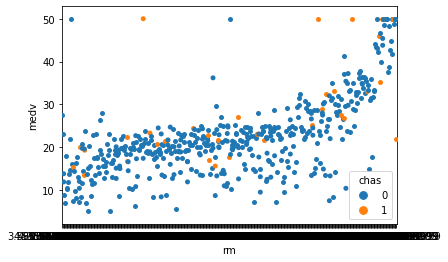

In [7]:
sb.swarmplot(x='rm', y='medv', hue = 'chas', data=boston_data)

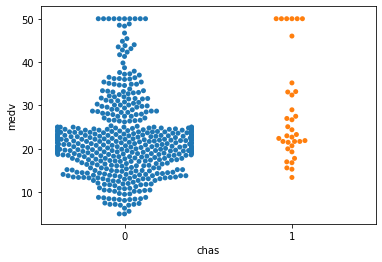

In [8]:
sb.swarmplot(x='chas', y='medv', data=boston_data)

There look to be very few houses by the river - indicated by "1". Let's confirm the ratio:

In [9]:
boston_data['chas'].value_counts() #count unique values

0    471
1     35
Name: chas, dtype: int64

In [10]:
#separate datasets out
by_river = boston_data[boston_data['chas']==1]
not_river = boston_data[boston_data['chas']==0] 

Repeating commands we have already used on the dataset as a whole, I now want to see if I can spot any stark difference.

In [11]:
by_river.describe() #get a stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [12]:
not_river.describe() #get a stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.744447,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.876818,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.695030,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A quick comparison across the board shows that the river estates cost more on average, despite having roughly the same average of rooms. It appears estates by the river average an older age. Interestingly, the tax appears to be lower. However, considering that we have much less data available for the river estates, it is more difficult to judge validity of these claims.

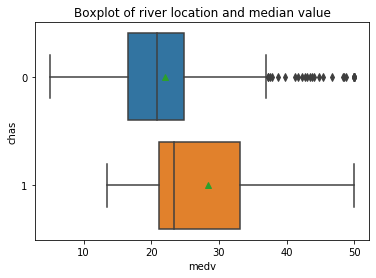

In [13]:
sb.boxplot(data = boston_data, x='medv', y='chas', orient = 'h', showmeans=True)
plt.title('Boxplot of river location and median value')
plt.show()

# Part 2: Inferential Statistics


It appears by looking at the outcome of the descriptive analysis in Part 1 that houses by the river are more expensive than houses not by the river. However, we have also established that the pool of data for houses by the river is significantly smaller. This brings the question whether this is a fair assumption to make or whether we simply do not have enough data points for properties by the river to confidentlty make this assumption. Inferential statistics allows to make inferences about the population from sample data and should help us understand if the differences observed are statistically relevant.(1)

Judging by the above, one would expect that in Boston the more expensive parts of the city tend to be besides the Charles river. The Charles river is the major river in Boston, it runs past Harvard university and MIT, therefore my hypothesis is that this is more expensive.

The first method I am looking at is a t-test, also known as Student's t-test. This aims to judge whether two means are different from each other, and how much so. The more significant the difference, the less likely it is that the difference has occured by chance in your sample data. If the outcome of the t-test, the pvalue is lower than 0.05, we can reject the null hypothesis ("there is no difference") and accept our hypothesis that house prices near the river are more expensive.


### References
(1) https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a


In [14]:
import scipy.stats as ss
import numpy as np
import seaborn as sb

In [15]:
ss.ttest_ind(by_river.medv,not_river.medv)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

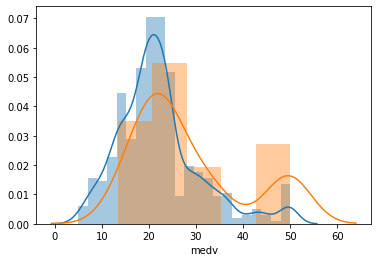

In [16]:
sb.distplot(not_river.medv)
sb.distplot(by_river.medv)

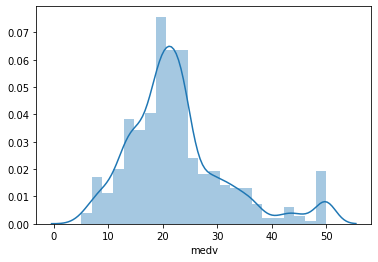

In [17]:
sb.distplot(boston_data.medv)

Initial t-tests showed a very low pvalue. I was interested to see if this trend would continue if the sample sizes were closer. Therefore I have drawn on the numpy.random package to pick out 35 samples of houses not by the river. This choice is made uniformly and thus should largely retain the distribution of the overall data. To make this more representative I repeated the operation 1000 times and mostly the average of the outcome pvalues is around 0.3. This is already significantly higher than above ttest, albeit not close to 5%, hence we can still lean towards dismissing the hypothesis. Further tests will be required.

In [18]:
#data from houses not by river overpower data from river, aim to rerun the test with equal amount of data on both sides
#independent
#not suitable for more than 2 variables

results = []

for i in range(1000):
    random_not_river = np.random.choice(not_river.medv, 35)
    #ss.ttest_ind(by_river.medv,random_not_river)
    result = ss.ttest_ind(by_river.medv,random_not_river)
    results.append(result.pvalue)
    

def Average(lst): 
    return sum(lst) / len(lst)

ave = Average(results)
print(ave)

0.03309350412293873


## Part 3: Predict: 

In [19]:
import keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre

from sklearn.datasets import load_boston

#load dataset
boston_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
print(boston_data.head()) #prints first 5 rows

by_river = boston_data[boston_data['chas']==1]
not_river = boston_data[boston_data['chas']==0] 

Using TensorFlow backend.


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [20]:
#playing around with making the dataset more usable by changing values into different datatypes
#2 ways:

#https://stackoverflow.com/questions/42788713/pandas-mapping-to-true-false-as-string-not-boolean
booleanDictionary = {1: 'TRUE', 0: 'FALSE'}

#adding new column copying chas
boston_data['by_River'] = boston_data['chas'].astype(np.int)
#replacing it with boolean values
boston_data['by_River'] = boston_data['chas'].replace(booleanDictionary)

#adding two columns for is_by_river and is_not_by_river
boston_data['is_by_river'] = (boston_data['chas'] == 1).astype(np.int)
boston_data['is_not_by_river'] = (boston_data['chas'] == 0).astype(np.int)

boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,by_River,is_by_river,is_not_by_river
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,FALSE,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,FALSE,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,FALSE,0,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,FALSE,0,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,FALSE,0,1


Above you can see different ways to re-write your data in whichever data format works best for the occassion. When presenting or handing data over to the business, it might make sense to recode some 0 and 1s to text as that is more intuitive for the human eye - especially if they do not have a science background. For our purposes however, creating a neural network, it will be easier to deal with numeric values 0 and 1s. Generally, it makes sense to create new columns rather than amending the original dataset to avoid issues down the line.

In [21]:
#create inputs and outputs

outputs = boston_data['medv']
inputs = boston_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'is_by_river', 'is_not_by_river']]


In [22]:
#create a new neural network

nn = kr.models.Sequential()

#add a layer
nn.add(kr.layers.Dense(10, input_dim=14, activation = "linear"))
nn.add(kr.layers.Dense(10, activation = "linear"))
nn.add(kr.layers.Dense(1, activation = "linear"))
nn.compile(loss="mean_squared_error", optimizer="adam")

In [23]:
nn.fit(inputs, outputs, epochs=20,batch_size=10)

Epoch 1/20
506/506 [==============================] - 0s 556us/step - loss: 7270.3488
Epoch 2/20
506/506 [==============================] - 0s 90us/step - loss: 1573.1913
Epoch 3/20
506/506 [==============================] - 0s 93us/step - loss: 411.9135
Epoch 4/20
506/506 [==============================] - 0s 101us/step - loss: 187.3341
Epoch 5/20
506/506 [==============================] - 0s 88us/step - loss: 155.2411
Epoch 6/20
506/506 [==============================] - 0s 105us/step - loss: 143.2270
Epoch 7/20
506/506 [==============================] - 0s 105us/step - loss: 139.4996
Epoch 8/20
506/506 [==============================] - 0s 91us/step - loss: 129.4957
Epoch 9/20
506/506 [==============================] - 0s 110us/step - loss: 123.1643
Epoch 10/20
506/506 [==============================] - 0s 87us/step - loss: 116.0144
Epoch 11/20
506/506 [==============================] - 0s 93us/step - loss: 112.0427
Epoch 12/20
506/506 [==============================] - 0s 102us/ste

In [24]:
nn.predict(inputs)

array([[26.784262  ],
       [22.884012  ],
       [23.596222  ],
       [24.128365  ],
       [24.07324   ],
       [23.400934  ],
       [24.971312  ],
       [24.26013   ],
       [23.12929   ],
       [23.999971  ],
       [24.22114   ],
       [24.702387  ],
       [25.349909  ],
       [22.478544  ],
       [20.713165  ],
       [22.45143   ],
       [22.876196  ],
       [21.110712  ],
       [15.886619  ],
       [21.546995  ],
       [19.689297  ],
       [21.216682  ],
       [21.52608   ],
       [20.91997   ],
       [21.193722  ],
       [15.496089  ],
       [20.197346  ],
       [15.828681  ],
       [21.116325  ],
       [20.939793  ],
       [18.875624  ],
       [20.09207   ],
       [11.131156  ],
       [18.715345  ],
       [11.854659  ],
       [22.136282  ],
       [21.046923  ],
       [23.034641  ],
       [23.194635  ],
       [29.71752   ],
       [30.137938  ],
       [24.479753  ],
       [23.934317  ],
       [24.651655  ],
       [23.217287  ],
       [23

In [25]:
outputs

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

Below a quick check to understand how far off the expected output the newly generated output of the neural network is.

In [26]:
#calculation to see how different two arrays are
#as per Ian McLoughlin https://github.com/ianmcloughlin/datasets/blob/master/dogs.csv
np.sqrt(np.sum(nn.predict(inputs).T - outputs.as_matrix())**2) #transpose - #turn pandas data series into numpy array to be able to subtract

C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


380.37893191576006

## Pre-processing

We can see above that the outputs have high losses - they are not very accurate, the model does not seem well-trained. We can increase the epochs and while that will decrease losses, it is not providing a satisfactory result. 

In order to make the neural network more accurate it is crucial to work with the data at hand. There is no one-size-fits-all but in general it is a good idea to pre-process the data. Two common methods for pre-processing is standardization and whitening. 

Standardization
As the sklearn documentation (1) outlines, "Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation." 

We can see below, how applying the sklearn scale method to the input data centers it around 0. Note: this is only going to work for numeric values.


(1) https://scikit-learn.org/stable/modules/preprocessing.html

Whitening: 
While standardization looks at the variables individually, whitening tackles the correlation between variables and removes it. 

Since we are altering the data we work with, it is good practise to capture the values used for scaling to have a record and replicate if needed. The sklearn documentation provides guidance on how to do this:

In [47]:
#store scaling info in variable as per https://scikit-learn.org/stable/modules/preprocessing.html
scaler = pre.StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
#scale inputs and store in new variable
inputs_pre = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)

The above code creates a new variable inputs_pre and stores in it a scaled Pandas Dataframe of the inputs. Below I am printing the new mean and standard deviation of the dataset and we can see that the mean is now almost 0, the standard deviation almost 1.  This step was successful.

In [49]:
#verify means are close to 0
inputs_pre.mean()

crim              -8.688702e-17
zn                 3.306534e-16
indus              2.804081e-16
nox               -8.071058e-16
rm                -5.978968e-17
age               -2.650493e-16
dis                8.293761e-17
rad                1.514379e-15
tax               -9.934960e-16
ptratio            4.493551e-16
b                 -1.451408e-16
lstat             -1.595123e-16
is_by_river       -3.100287e-16
is_not_by_river    3.194634e-16
dtype: float64

In [50]:
#verify standard deviation approaching 1
inputs_pre.std()

crim               1.00099
zn                 1.00099
indus              1.00099
nox                1.00099
rm                 1.00099
age                1.00099
dis                1.00099
rad                1.00099
tax                1.00099
ptratio            1.00099
b                  1.00099
lstat              1.00099
is_by_river        1.00099
is_not_by_river    1.00099
dtype: float64